# Introduction
# Eigenfaces and Principal Component Analysis (PCA)

In this notebook, we will explore the concept of Eigenfaces, which are eigenvectors used in the computer vision problem of human face recognition. By reducing the dimensionality of high-dimensional data like images, PCA enables faster and more efficient computations while preserving as much variability as possible.

## Learning Objectives
- Understand the steps involved in performing PCA on image data.
- Learn how to reconstruct images from their reduced dimensional representations.
- Visualize how different numbers of components affect the reconstruction quality.

In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_and_process_images(folder_path: str, num_images_to_display: int = 10, image_size: tuple = (120, 120)):
    """
    Display a specified number of images from a folder in a grid and prepare all images for PCA.

    Args:
        - folder_path (str): Path to the folder containing the images.
        - num_images_to_display (int): Number of images to display in a grid.
        - image_size (tuple): Size to which images should be resized (width, height).
        
    Returns:
        tuple: A tuple containing the list of all original images, the numpy array of images for PCA, and the mean image.
    """
    original_images = []
    input_vector = []
    displayed_images = 0

    # Determine the grid size for plotting the specified number of images
    grid_size = int(np.ceil(np.sqrt(num_images_to_display)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
    axes = axes.flatten()

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for image files
            with Image.open(os.path.join(folder_path, filename)) as img:
                # Resize image and convert to numpy array
                img_resized = img.resize(image_size)
                img_array = np.array(img_resized)
                # Append original images and flattened image to the lists
                original_images.append(img_array)
                input_vector.append(img_array.flatten())
                # Display the image if within the specified number
                if displayed_images < num_images_to_display:
                    axes[displayed_images].imshow(img_array)
                    axes[displayed_images].axis('off')  # Hide the axes
                    displayed_images += 1

    # Hide any remaining axes without images
    for ax in axes[displayed_images:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    # Convert the list of images to a 2D numpy array for PCA
    data = np.array(input_vector)
    # Calculate the mean image
    mean_img = np.mean(data, axis=0)

    return original_images, data, mean_img


### Display Sample Images

Before we dive into PCA, let's take a look at some sample images from our dataset. It's important to understand the kind of data we are working with. In the following cell, we will display some images of faces that we will later use to extract eigenfaces.

### Why Resize Images?
Reducing the resolution of images decreases their dimensionality, which directly impacts the computational cost of PCA. While this may result in some loss of detail, it is an essential trade-off to make PCA computationally feasible for large datasets.

### Visualizing Sample Images
To better understand the dataset, we will display a subset of images in a grid. Observing these samples allows us to familiarize ourselves with the facial features and variations that PCA will later analyze.

---

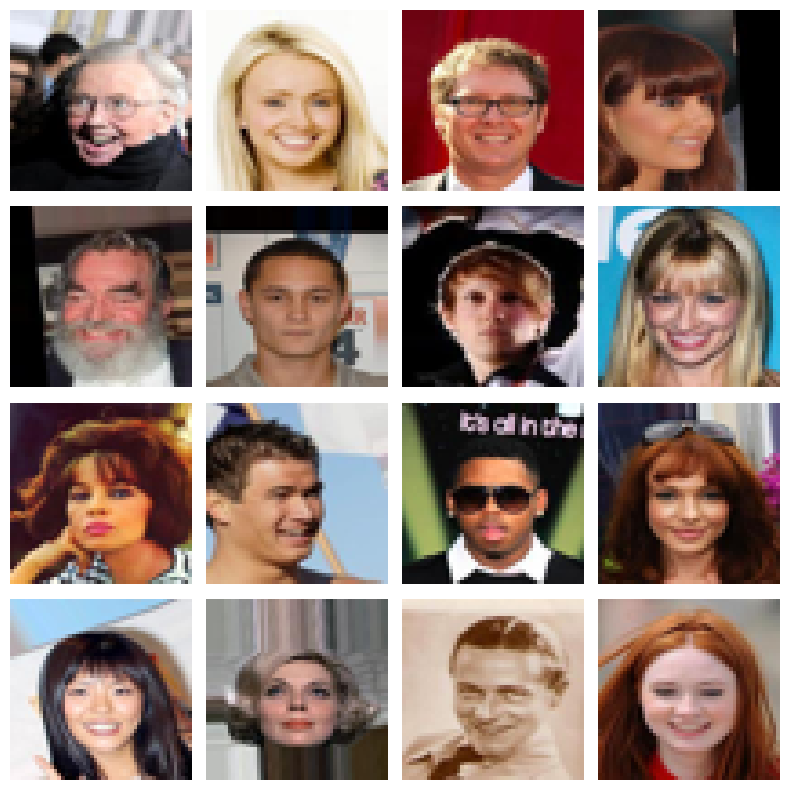

Input vector shape: (1000, 7500)
- Number of images: 1000
- Pixels per image: 7500 (equivalent to 50x50 resolution)


In [3]:
# Set the path to dataset
images_path = "/path/to/your/images"

# Set the image size (the bigger, the more it will take to perform pca)
image_size = (50, 50)

# Define the number of images to display on the grid
num_images = 16

# Create the dataset and visualize some samples
original_images, input_vector, mean_img = display_and_process_images(folder_path=images_path, num_images_to_display=num_images, image_size=image_size)

# Print the shape and details about the input vector
print(f"Input vector shape: {input_vector.shape}")
print(f"- Number of images: {input_vector.shape[0]}")
print(f"- Pixels per image: {input_vector.shape[1]} (equivalent to {image_size[0]}x{image_size[1]} resolution)")

## Principal Component Analysis (PCA) for Eigenfaces

Principal Component Analysis (PCA) is a mathematical technique used to reduce the dimensionality of data while preserving as much variability as possible. It achieves this by transforming the data into a new coordinate system where the axes (principal components) align with the directions of maximum variance in the dataset.

When applied to facial images, PCA identifies patterns in the pixel intensities and uses these patterns (eigenvectors) to represent the faces. These eigenvectors are known as **Eigenfaces**. Eigenfaces capture the most important features that differentiate faces, making them highly effective for tasks like facial recognition.

---

### PCA Process Explained

To better understand the steps, let’s break them down with examples and explanations:

#### 1. **Normalization**
   - **What happens?**: We subtract the mean value from each feature across all observations. This centers the data around zero, ensuring that PCA focuses on the variance and not the absolute values.
   - **Why?**: Centering the data prevents one feature from dominating due to a higher magnitude (e.g., pixel intensities from lighting differences).
   - **Representation**:
     Imagine the pixel intensity distribution of an image shifted such that its average intensity is zero. This allows PCA to focus on patterns of variability (e.g., changes in lighting or facial features).

#### 2. **Covariance Matrix**
   - **What happens?**: The covariance matrix measures how features vary with respect to one another.
   - **Why?**: It captures relationships between dimensions (e.g., how the intensity of one pixel might correlate with its neighbor).
   - **Representation**:
     Think of it as a map of relationships: positive values indicate that two features increase together, while negative values suggest they vary inversely.

#### 3. **Eigenvalues and Eigenvectors**
   - **What happens?**: We compute the eigenvalues and eigenvectors of the covariance matrix.  
     - **Eigenvalues**: Indicate how much variance each eigenvector explains.
     - **Eigenvectors**: Represent the directions of maximum variance.
   - **Why?**: These form the basis for dimensionality reduction. Eigenvectors with the highest eigenvalues explain the most variance and are retained for analysis.
   - **Representation**:
     Eigenvectors are essentially "directions" (or patterns in the dataset), and eigenvalues tell us how important each pattern is.

#### 4. **Sorting**
   - **What happens?**: The eigenvalues and their corresponding eigenvectors are sorted in descending order of eigenvalues.
   - **Why?**: This ensures that the most significant components (those explaining the most variance) are considered first.

#### 5. **Component Selection**
   - **What happens?**: We retain the top `num_components` eigenvectors.
   - **Why?**: This reduces the dimensionality of the data while keeping the most informative features.
   - **Representation**:
     If we have 120 components, we’re essentially summarizing each face using just 120 "key patterns" instead of thousands of pixels.

#### 6. **Projection**
   - **What happens?**: The original data is projected onto the new feature space formed by the eigenvectors.
   - **Why?**: This transforms the data into a lower-dimensional space where each observation is represented as a combination of principal components.
   - **Representation**:
     Imagine compressing a detailed image into a simplified sketch, where only the key features are retained.

---

### Outputs of the PCA Function

The function produces the following:

1. **Projected Data**:
   - Transformed data in the new feature space, with rows corresponding to observations and columns to principal components.
   - **Use**: This is the lower-dimensional representation of the original data.

2. **Eigenvalues**:
   - Explain how much variance each principal component contributes.
   - **Use**: Help decide how many components to keep by observing the cumulative variance.

3. **Eigenvectors**:
   - Directions in the original space that capture the maximum variance.
   - **Use**: These form the basis for the new feature space and represent the "Eigenfaces."

---

In [4]:
def pca(data: np.array, num_components: int) -> tuple:
    """
    Perform Principal Component Analysis (PCA) on the given data.

    Args:
        - data: A 2D numpy array where each row represents an observation and each column a feature.
        - num_components: The number of principal components to retain.

    Returns:
        A tuple containing:
        - projected_data: The data projected onto the reduced eigenspace.
        - eigenvalues: The eigenvalues corresponding to the principal components.
        - eigenvectors: The eigenvectors representing the principal components.
    """
    # Step 1: Compute the mean of the data
    # YOUR CODE HERE (Hint: Use np.mean with axis=0)

    # Step 2: Normalize the data by subtracting the mean
    # YOUR CODE HERE

    # Step 3: Compute the covariance matrix
    # YOUR CODE HERE (Hint: Use np.cov with rowvar=False)

    # Step 4: Compute eigenvalues and eigenvectors
    # YOUR CODE HERE (Hint: Use np.linalg.eigh)

    # Step 5: Sort the eigenvalues and eigenvectors in descending order
    # YOUR CODE HERE (Hint: Use np.argsort and reverse the order)

    # Step 6: Select the top 'num_components' eigenvectors and eigenvalues
    # YOUR CODE HERE

    # Step 7: Project the data onto the new feature space
    # YOUR CODE HERE (Hint: Use np.dot to project the normalized data)

    return projected_data, eigenvalues, eigenvectors


In [ ]:
# Set the number of components to extract
num_components = 120
# Perform PCA to project the data and extract both eigen values and vectors
projected_data, eigenvalues, eigenvectors = pca(input_vector, num_components=num_components)

Original eigenvectors shape: (1000, 7500))
Data shape after PCA: (1000, 120)
Retained eigenvectors shape: (7500, 120)
Projected data shape: (1000, 120)
Number of eigenvalues retained: 120


## Understanding Explained Variance in PCA

The concept of explained variance is crucial in Principal Component Analysis (PCA). It allows us to determine how much of the original dataset's variability is captured by each principal component. The `plot_explained_variance` function visualizes this concept, providing insights into the significance of each component and helping us decide how many components to retain.

---

In [6]:
def plot_explained_variance(eigenvalues: np.array, num_components_to_display: int = 120, threshold: float = 95):
    """
    Plot the explained variance by each principal component.

    Args:
        - eigenvalues: The eigenvalues obtained from PCA.
        - num_components_to_display: Number of principal components to display on the plot.
        - threshold: The cumulative variance threshold to highlight (e.g., 95%).
    """
    # Step 1: Calculate the total variance
    # YOUR CODE HERE

    # Step 2: Calculate the explained variance by each component
    # YOUR CODE HERE (Hint: Divide each eigenvalue by the total variance and multiply by 100)

    # Step 3: Calculate the cumulative explained variance
    # YOUR CODE HERE (Hint: Use np.cumsum)

    # Step 4: Find the number of components to reach the threshold
    # YOUR CODE HERE (Hint: Use np.argmax)

    # Step 5: Plot the individual and cumulative explained variance
    # YOUR CODE HERE (Hint: Use plt.bar and plt.plot for the plots)


### Plot Elements

The graph consists of two key elements:

1. **Bar Plot (Blue Bars)**:
   - Each bar represents the proportion of the total variance explained by an individual principal component.
   - The height of each bar indicates how much information (variance) that component contributes.
   - Taller bars at the beginning signify that the initial components are more important in describing the dataset.

2. **Line Plot (Red Line)**:
   - This represents the cumulative explained variance.
   - It shows the total variance captured as we include more components.
   - A steep increase in the curve at the beginning indicates that a few components capture most of the variance.

---

### How to Use the Plot

1. **Choosing the Number of Components**:
   - Look for the "elbow" in the cumulative explained variance plot. This is the point where adding more components has diminishing returns in terms of variance explained.
   - For example, if the curve plateaus after the 30th component, using more than 30 components may not significantly improve the model.

2. **Variance Threshold**:
   - A common practice is to retain components that capture at least 95% of the variance. This ensures a balance between data simplification and information retention.

3. **Trade-off Between Dimensionality and Information**:
   - Retaining fewer components reduces dimensionality but may lose information.
   - Retaining too many components can make the model unnecessarily complex without significant benefits.

---

### Additional Insights from This Graph

- **Dominance of Initial Components**:
  - The first few components explain the majority of the variance. This is a typical behavior in datasets with strong patterns or correlations.

- **Plateau Effect**:
  - Once the cumulative explained variance stabilizes, additional components contribute marginally to the total variance.

- **Compression Ratio**:
  - By selecting fewer components, we effectively compress the dataset, making it more computationally efficient without losing significant information.

---

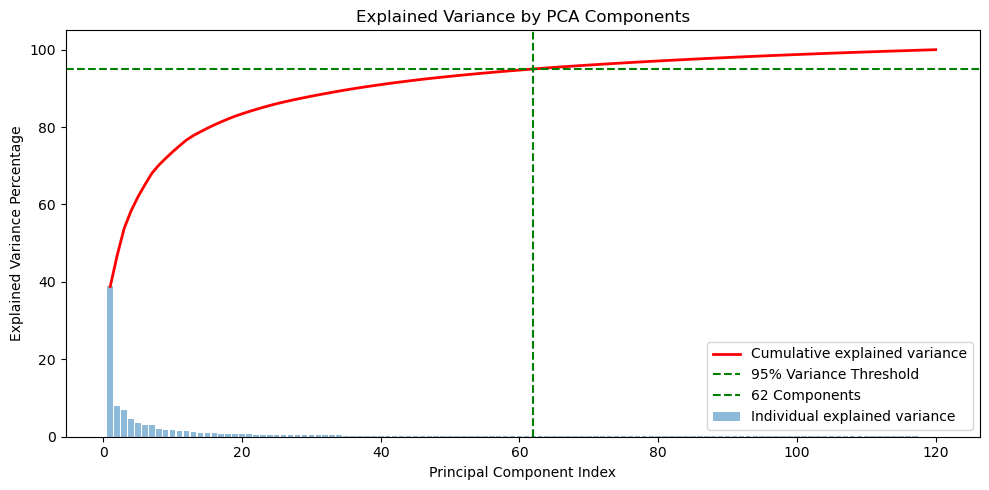

Number of components to reach 95% variance: 62


In [7]:
plot_explained_variance(eigenvalues=eigenvalues)

---

### Practical Example

#### Based on the Provided Graph:
- **Steep Initial Curve**:
  - The first ~20 components explain a large portion of the variance, as shown by the steep rise in the cumulative line plot.

- **Plateau After ~60 Components**:
  - The line flattens, indicating that adding more components after this point offers little improvement in terms of explained variance.

- **Interpretation**:
  - A sensible choice might be to retain the first 60 components, as they capture the majority of the dataset's information while significantly reducing dimensionality.

## Visualization of the Mean Face and Eigenfaces

After performing Principal Component Analysis (PCA) on our dataset, we gain two key insights into the data:

1. **The Mean Face**:
   - The mean face represents the "average" face in the dataset.
   - It is calculated by averaging the pixel intensities across all images.
   - The mean face serves as a baseline reference for understanding the variations captured by the eigenfaces.

2. **Eigenfaces**:
   - Each eigenface corresponds to an eigenvector from PCA, highlighting a specific pattern of variation in the dataset.
   - Eigenfaces capture the key features that distinguish one face from another, such as the shape of the eyes, nose, or mouth.
   - They are abstract representations, but when combined, they can reconstruct any face in the dataset.

---

### Steps for Visualization

1. **Calculate the Mean Face**:
   - Compute the mean of all pixel intensities across the dataset.
   - Displaying the mean face gives us an understanding of the average characteristics of the dataset.

2. **Normalize and Display Eigenfaces**:
   - Eigenfaces are derived from eigenvectors, but their pixel values need to be normalized to ensure proper visualization.
   - Each eigenface is reshaped back to the original dimensions of the images.

3. **Grid Display**:
   - Display eigenfaces in a grid format for easy comparison. The grid shows how the eigenfaces capture distinct variations in the dataset.

---

In [8]:
def display_mean_and_eigenvectors(input_vector: np.array, eigenvectors: np.array, image_shape: tuple, num_components_to_display: int):
    """
    Display the mean image and the eigenfaces (principal components).

    Args:
        - input_vector: The dataset of flattened images.
        - eigenvectors: The eigenvectors computed from PCA.
        - image_shape: The shape to reshape the flattened images into.
        - num_components_to_display: Number of eigenfaces to display.
    """
    # Step 1: Calculate the mean image
    # YOUR CODE HERE

    # Step 2: Display the mean image
    # YOUR CODE HERE (Hint: Use plt.imshow with np.reshape)

    # Step 3: Loop through eigenvectors and display the eigenfaces
    for i in range(num_components_to_display):
        # YOUR CODE HERE (Hint: Normalize and reshape each eigenvector for display)


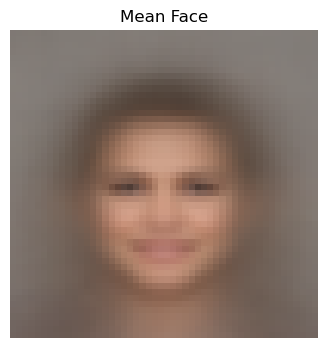

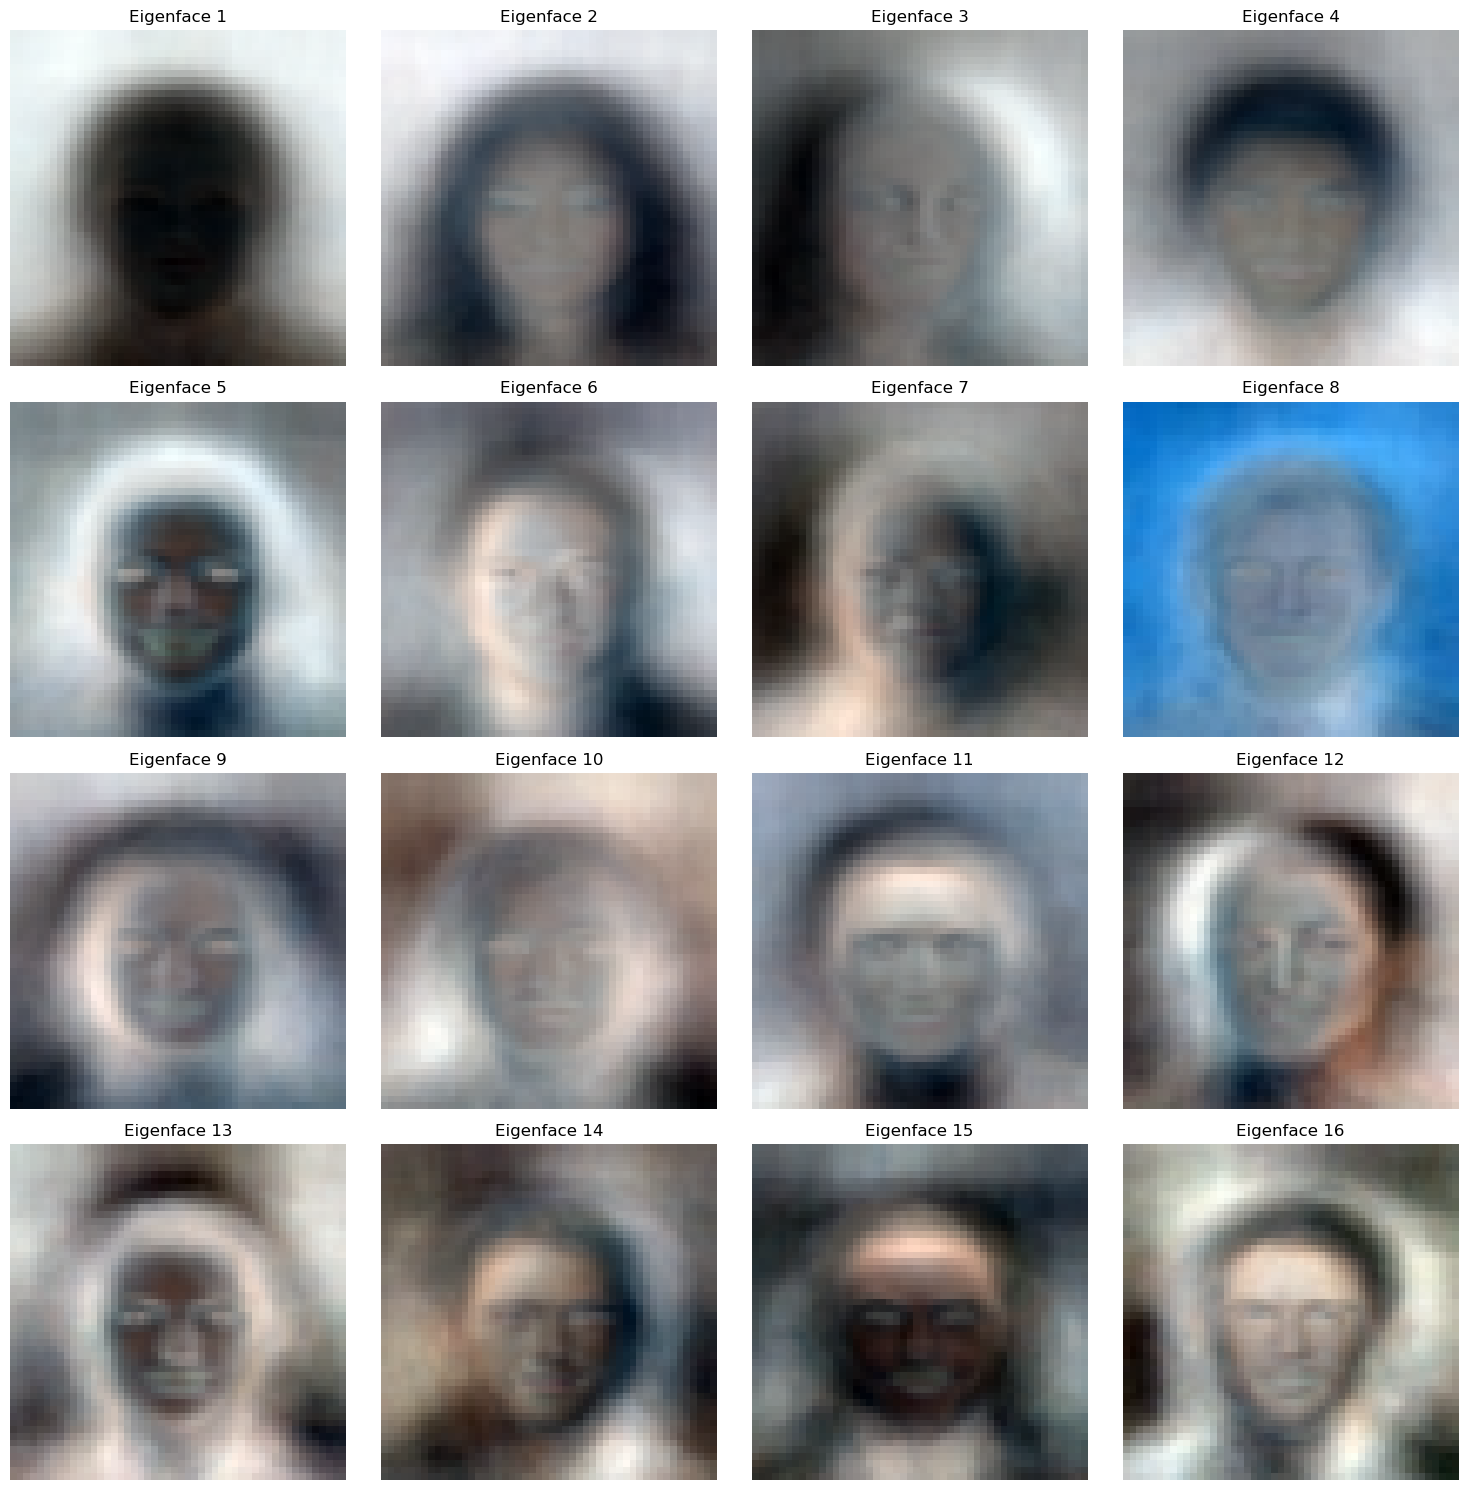

In [9]:
# Display the mean image and a grid of eigenvectors (eigenfaces) of the dataset
display_mean_and_eigenvectors(input_vector=input_vector, eigenvectors=eigenvectors, image_shape=(50, 50, 3), num_components_to_display=16)

### Observations from the Images

1. **Mean Face**:
   - The mean face appears blurry because it represents the average of all faces in the dataset, smoothing out unique features.

2. **Eigenfaces**:
   - The first eigenfaces capture the most significant variations, often associated with overall brightness, alignment, or facial symmetry.
   - Subsequent eigenfaces capture finer details such as specific facial features (e.g., eyes, nose, or mouth).

---

### Applications of Eigenfaces

1. **Face Recognition**:
   - Eigenfaces can be used to compare and recognize faces by projecting new images onto the eigenface space and comparing their coefficients.

2. **Face Reconstruction**:
   - Faces can be reconstructed using a weighted sum of eigenfaces, demonstrating the ability of PCA to encode and decode facial information.

3. **Dimensionality Reduction**:
   - By retaining only the most important eigenfaces, we reduce the data's dimensionality while preserving key information.

---

## Modes of Variation in PCA

Principal Component Analysis (PCA) allows us to decompose complex data (like images) into orthogonal components that capture variability in the dataset. Each principal component (eigenvector) represents a direction of variance, while its eigenvalue indicates the magnitude of that variance.

By analyzing **modes of variation**, we can visualize how individual components affect the data. This helps us understand the nature of the variability captured by PCA and how different features contribute to the data structure.

---

### Key Concepts

1. **Eigenvectors and Eigenvalues**:
   - **Eigenvectors**: Represent directions of variance in the dataset.
   - **Eigenvalues**: Quantify how much variance each eigenvector explains.
   - Together, they define the principal components.

2. **Standard Deviations**:
   - Scaling an eigenvector by its standard deviation shows how variations along that component affect the reconstructed image.
   - Positive and negative scaling create a range of variations.

3. **Mean Image**:
   - Acts as the baseline. Adding or subtracting scaled eigenvectors modifies this baseline to create varied versions.

---

### How `display_modes_of_variation` Works

1. **Input Parameters**:
   - `mean_img`: Baseline image representing the average of the dataset.
   - `eigenvectors`: Principal components derived from PCA.
   - `eigenvalues`: Magnitudes of variance explained by each eigenvector.
   - `comp`: Index of the principal component to vary.
   - `std_devs`: Range of standard deviations to apply to the selected eigenvector.

2. **Step-by-Step Process**:
   - Scale the selected eigenvector by each standard deviation and its corresponding eigenvalue.
   - Add the scaled eigenvector to the mean image to create variations.
   - Clip pixel values to ensure they remain in the valid range `[0, 255]`.
   - Display the variations in a grid for easy comparison.

3. **What the Output Shows**:
   - Each grid cell corresponds to an image reconstructed with the mean face plus or minus a scaled eigenvector.
   - Variations capture the specific influence of the eigenvector, such as changes in lighting, facial alignment, or expression.

---

In [10]:
def display_modes_of_variation(mean_img: np.array, eigenvectors: np.array, eigenvalues: np.array, comp: int, image_shape: tuple, std_devs: np.array):
    """
    Visualize modes of variation by varying a specific eigenvector.

    Args:
        - mean_img: The mean image of the dataset.
        - eigenvectors: The eigenvectors computed from PCA.
        - eigenvalues: The eigenvalues corresponding to the eigenvectors.
        - comp: The index of the eigenvector to vary.
        - image_shape: The shape to reshape the flattened images into.
        - std_devs: The range of standard deviations to scale the eigenvector.
    """
    # Step 1: Loop through the standard deviations
    for std in std_devs:
        # Scale the eigenvector and add it to the mean image
        # YOUR CODE HERE

        # Normalize and reshape the result for display
        # YOUR CODE HERE


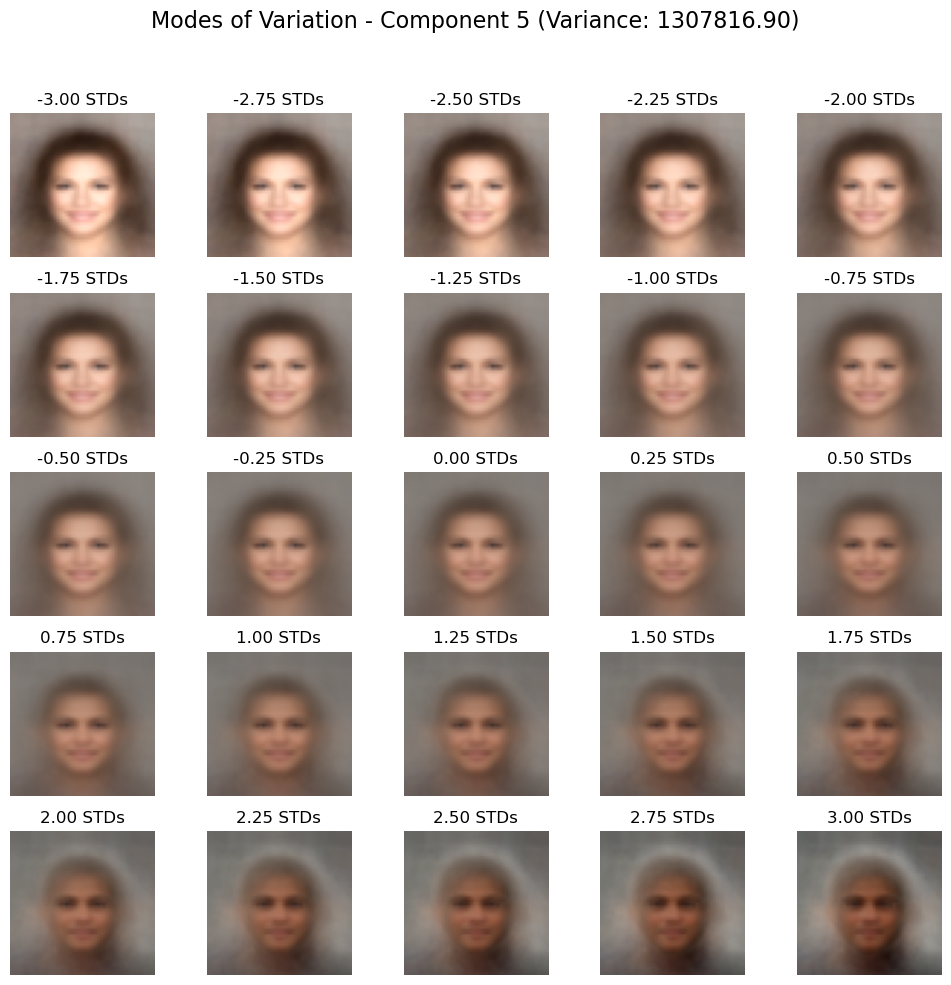

In [11]:
# Inspect the "Modes of Variation"
# Calculate the mean of the images
mean_img = np.mean(input_vector, axis=0)

# The original shape of the images
image_shape = (50, 50, 3) 

# Fifth eigenvector (indexing starts from 0) 
comp = 4 

# A range of standard deviations, from -3 to 3
std_devs = np.arange(-3.0, 3.25, 0.25)  

display_modes_of_variation(mean_img=mean_img,
                           eigenvectors=eigenvectors,
                           eigenvalues=eigenvalues,
                           image_shape=image_shape,
                           comp=comp,
                           std_devs=std_devs)

## Image Reconstruction Using Principal Components

Reconstructing images using Principal Component Analysis (PCA) demonstrates how well the most significant components capture the key features of the data. By progressively adding components, we can visualize the trade-off between dimensionality reduction and image quality.

---

### The Reconstruction Process

#### 1. **Original Image**:
   - The starting point for comparison is the original image, which contains all the pixel information.

#### 2. **Reconstruction Loop**:
   - We progressively reconstruct the image by adding one principal component at a time. Each iteration includes more information from the eigenfaces.

#### 3. **Truncation of Eigenvectors**:
   - At each step, we truncate the eigenvector matrix to include only the top `n` components, which capture the most variance.

#### 4. **Projection and Reconstruction**:
   - The image is projected onto the truncated eigenspace (dimensionality reduction).
   - The reconstruction is performed by adding the mean image to the projected data in the original space.

#### 5. **Grid Visualization**:
   - The original image and its reconstructions are displayed in a grid. This allows us to visually compare how adding components improves reconstruction quality.

---

In [14]:
def display_reconstruction_comparison(original_images: np.array, eigenvectors: np.array, input_vector: np.array, mean_img: np.array, image_shape: tuple, num_components: int, selected_img: int):
    """
    Reconstruct an image using an increasing number of principal components.

    Args:
        - original_images: List of original images.
        - eigenvectors: The eigenvectors computed from PCA.
        - input_vector: The dataset of flattened images.
        - mean_img: The mean image of the dataset.
        - image_shape: The shape to reshape the flattened images into.
        - num_components: Number of components to use for reconstruction.
        - selected_img: Index of the image to reconstruct.
    """
    # Step 1: Select the original image
    # YOUR CODE HERE

    # Step 2: Loop through the number of components
    for n_dims in range(1, num_components + 1):
        # Truncate the eigenvectors
        # YOUR CODE HERE

        # Project the image onto the truncated eigenspace and reconstruct it
        # YOUR CODE HERE

        # Normalize and reshape for display
        # YOUR CODE HERE



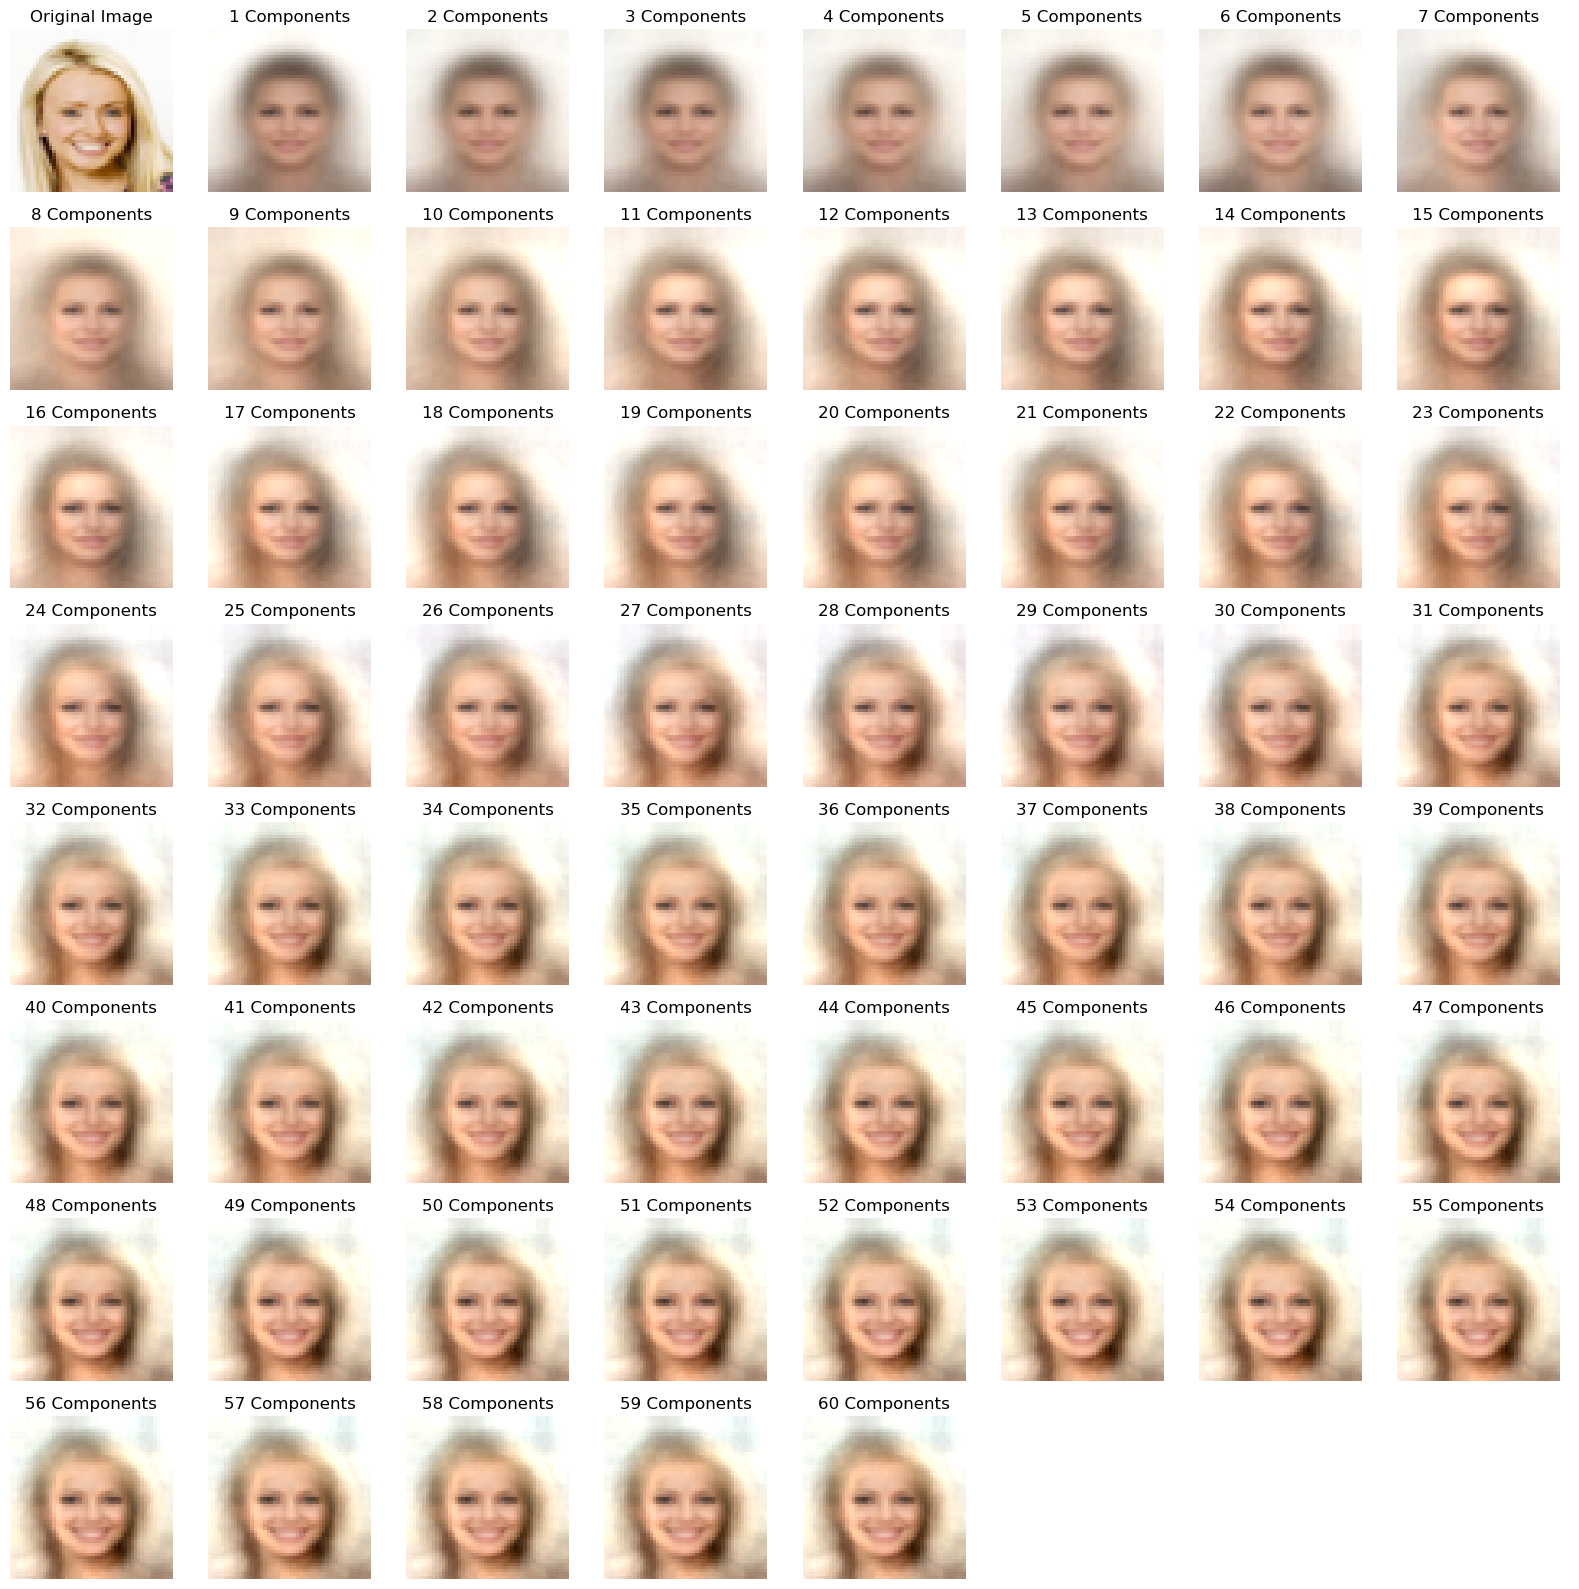

In [15]:
display_reconstruction_comparison(original_images=original_images,
                                  eigenvectors=eigenvectors,
                                  input_vector=input_vector,
                                  image_shape=(50, 50, 3),
                                  mean_img=mean_img,
                                  num_components=60,
                                  selected_img=1)

---

### Insights from the Visualization

1. **Low Number of Components**:
   - With only a few components, the reconstructed image is blurry and lacks detail.
   - This is because the first components primarily capture global features like brightness and alignment.

2. **Increasing Components**:
   - As more components are added, finer details like facial features (eyes, nose, mouth) become more apparent.

3. **High Number of Components**:
   - When most components are included, the reconstructed image closely resembles the original.

---

### Key Takeaways

1. **Trade-off Between Compression and Quality**:
   - PCA allows us to compress the data by retaining only the most important components. However, fewer components result in lower reconstruction quality.

2. **Dimensionality Reduction**:
   - By retaining only a subset of the components, we can significantly reduce the dimensionality of the data while preserving most of its information.

3. **Applications**:
   - This technique is widely used in tasks like image compression, face recognition, and noise reduction.

---